<a href="https://colab.research.google.com/github/Kalidsa/Projeto-de-Minera-o-de-Textos---CDII/blob/main/Minera%C3%A7%C3%A3o_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo geral -  trabalho de mineração de textos


---



**Aluna: Kalidsa Oliveira**

**Curso: Engenharia de Computação**

 **Disciplina: Ciência de dados II**



---

Este trabalho tem por objetivo desenvolver e avaliar os seus conhecimentos e
habilidades em relação a aplicação das etapas do processo de KDT (Knowledge Discovery
in Texts) estudadas em aula: seleção, limpeza, transformação, mineração e
interpretação de dados. Trata-se, portanto, de um projeto de mineração de textos.

Para tanto, foram coletados 300 comentários de usuários para cada um dos
aplicativos supracitados, totalizando 3.000 comentários. Para cada comentário,
avaliadores humanos o classificaram em uma polaridade (positivo ou negativo) e em
uma emoção de acordo com as emoções básicas de Ekman e Cordaro (2011) que são:

• Felicidade: Representa uma experiência gratificante e positiva para o usuário ao usar o aplicativo;

• Surpresa: Indica uma reação inesperada e positiva do usuário durante a utilização do aplicativo;

• Tristeza: Reflete o sentimento de descontentamento ou a ausência de uma característica desejada no aplicativo, mas mantém uma apreciação geral pelo aplicativo;

• Neutro: Caracteriza a neutralidade na avaliação, com a ausência de manifestações emocionais;

• Medo: Sinaliza a presença de medo ou insegurança por parte do usuário relacionado ao uso do aplicativo;

• Nojo: Descreve uma sensação desagradável causada por uma
característica do aplicativo, prejudicando a experiência do usuário;

• Raiva: Atribuída quando há um nível notável de agressividade na
avaliação do usuário.

#Carregamento dos dados
O código abaixo lê o arquivo CSV avaliacoes_playStore.csv em um DataFrame e exibe as primeiras cinco linhas desse DataFrame.

In [477]:
import pandas as pd
data_content = pd.read_csv('apps_reviews.csv', sep=',')
data_content

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness,NaN
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness,NaN
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness,NaN
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness,NaN
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust,NaN
...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,Não funciona!! Reconhimento facial diz que nen...,negative,disgust,NaN
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,A experiência com o App não está sendo boa. El...,negative,disgust,NaN
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,"Não consigo logar de jeito nenhum, o código de...",negative,disgust,NaN
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,Funcionava até ultima atualização. Por algum m...,negative,disgust,NaN


In [478]:
data_content.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [479]:
data_content.loc[0, 'content']

'O app da Shopee é razoável. Apesar de ser fácil de utilizar, apresenta alguns bugs. Por exemplo: Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. Sugestões de produtos que não têm nada a ver com coisas de nosso interesse. Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. Falhas para carregar certos anexos para avaliação dos produtos. No geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

In [480]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Limpeza de dados

verificação de objetos duplicados

In [481]:
data_content.duplicated().sum()

0

Análise e remoção dos registros nulos.

In [482]:
data_content.isnull().any()

reviewId              False
app_name              False
content               False
sentiment_polarity    False
sentiment             False
Unnamed: 5             True
dtype: bool

In [483]:
data_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            3011 non-null   object
 1   app_name            3011 non-null   object
 2   content             3011 non-null   object
 3   sentiment_polarity  3011 non-null   object
 4   sentiment           3011 non-null   object
 5   Unnamed: 5          1 non-null      object
dtypes: object(6)
memory usage: 141.3+ KB


In [484]:
data_content2 = pd.DataFrame(data_content)

columns_to_drop = [
    'Unnamed: 5'
]

data_content2.drop(columns=columns_to_drop, inplace=True)

data_content2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            3011 non-null   object
 1   app_name            3011 non-null   object
 2   content             3011 non-null   object
 3   sentiment_polarity  3011 non-null   object
 4   sentiment           3011 non-null   object
dtypes: object(5)
memory usage: 117.7+ KB


## Pré-processamento

Remoção dos caracteres que não são latinos e colocando todas as palavras para minúsculas

In [485]:
import regex # trabalhar com expressões regulares
data_content2['content'] = data_content2['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

data_content2.loc[0, 'content']

'O app da Shopee é razoável  Apesar de ser fácil de utilizar  apresenta alguns bugs  Por exemplo  Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  Sugestões de produtos que não têm nada a ver com coisas de nosso interesse  Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  Falhas para carregar certos anexos para avaliação dos produtos  No geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

In [486]:
data_content2['content'] = data_content2['content'].apply(lambda x: str(x).lower())

data_content2.loc[0, 'content']

'o app da shopee é razoável  apesar de ser fácil de utilizar  apresenta alguns bugs  por exemplo  sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  sugestões de produtos que não têm nada a ver com coisas de nosso interesse  dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  falhas para carregar certos anexos para avaliação dos produtos  no geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

Função para remover stopwords mais facilmente no datafreme

In [487]:
import nltk #caso não funcione, adicione a linha
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

data_content2['content'] = data_content2['content'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [488]:
data_content2.loc[0, 'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

#Exploração de dados

Abaixo são gerados gráficos para as váriavies categóricas: sentiment e sentiment_polarity, para podermos explorar através dos histogramas a contagem desses valores separadas nas suas categorias.





In [489]:
import plotly.express as px

px.histogram(data_content2, x='sentiment')

In [490]:
import plotly.express as px

px.histogram(data_content2, x='sentiment_polarity')

In [491]:
px.histogram(data_content2, x = 'sentiment', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [492]:
px.histogram(data_content2, x = 'app_name', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [493]:
px.histogram(data_content2, x = 'app_name', text_auto = True, color = 'sentiment',  barmode = 'group')


# Formatação de dados

Para as colunas de sentiment_polarity e sentiment

sentiment_polarity = [negative, neutral, positive]

sentiment = [ anger, disgust, fear, happiness, neutral, sadness]


---


1.  Transformando a coluna sentiment_polarity, que é ordinal, para númerica utilizando o OrdinalEncoder
2.  Transformando a coluna sentiment, que é nominal, também para númerica utilizando OneHotEncoder




#1.  Transformando a coluna sentiment_polarity, que é ordinal, para númerica utilizando o OrdinalEncoder

In [494]:
data_content2['sentiment_polarity'].value_counts()


sentiment_polarity
negative    1742
positive    1187
neutral       82
Name: count, dtype: int64

In [495]:
sent_pol_val = data_content2['sentiment_polarity'].unique()
sent_pol_val

array(['positive', 'negative', 'neutral'], dtype=object)

In [496]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

sent_pol = {'sentiment_polarity':[sent_pol_val[0], sent_pol_val[2], sent_pol_val[1]]}

sent_pol_dtf = pd.DataFrame(sent_pol, columns=['sentiment_polarity'])

sent_pol_dtf

,sentiment_polarity
0,positive
1,neutral
2,negative


In [497]:
sent_pol_dtf['sp_ordinal'] = sent_pol_dtf['sentiment_polarity'].map({val: i for i, val in enumerate(sent_pol_dtf['sentiment_polarity'])})

sent_pol_dtf


,sentiment_polarity,sp_ordinal
0,positive,0
1,neutral,1
2,negative,2


In [498]:
# Create a dictionary mapping 'sentiment_polarity' to 'sp_ordinal'
sent_pol_dict = dict(zip(sent_pol_dtf['sentiment_polarity'], sent_pol_dtf['sp_ordinal']))

# Map the ordinal values to the 'dados_noticias2' DataFrame
data_content2['sp_ordinal'] = data_content2['sentiment_polarity'].map(sent_pol_dict).astype(int).astype(str)

columns_to_drop = [
    'sentiment_polarity'
]

data_content2.drop(columns=columns_to_drop, inplace=True)

data_content2

,reviewId,app_name,content,sentiment,sp_ordinal
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,sadness,0
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,sadness,0
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,sadness,0
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,sadness,0
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,disgust,2
...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,disgust,2
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,disgust,2
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,disgust,2
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,disgust,2


#2. Transformando a coluna sentiment, que é nominal, também para númerica utilizando OneHotEncoder

In [499]:
data_content2['sentiment'].value_counts()

sentiment
disgust      952
sadness      864
anger        743
happiness    319
neutral       82
fear          47
surprise       4
Name: count, dtype: int64

In [500]:
sent_val = data_content2['sentiment'].unique()

sent_val_dft = pd.DataFrame(sent_val, columns=['sentiment'])
sent_val_dft

,sentiment
0,sadness
1,disgust
2,happiness
3,anger
4,fear
5,surprise
6,neutral


In [501]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

sent = {'sentiment':[sent_val[0], sent_val[1],sent_val[2], sent_val[3], sent_val[4],sent_val[5], sent_val[6]]}
sent = pd.DataFrame(sent, columns=['sentiment'])

# Inicializar o OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(sent[['sentiment']]).astype(int)

one_hot_encoded


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0]])

In [502]:
sent_dft_oneHot= pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['sentiment']))

sent_dft_oneHot

,sentiment_anger,sentiment_disgust,sentiment_fear,sentiment_happiness,sentiment_neutral,sentiment_sadness,sentiment_surprise
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0


In [503]:
sentiment_mapping = {sent: ''.join(map(str, one_hot)) for sent, one_hot in zip(sent_val, one_hot_encoded)}
sentiment_mapping

{'sadness': '0000010',
 'disgust': '0100000',
 'happiness': '0001000',
 'anger': '1000000',
 'fear': '0010000',
 'surprise': '0000001',
 'neutral': '0000100'}

In [504]:
# Criar uma nova coluna 'sentiment_binary' combinando as colunas codificadas
sent_dft['sentiment_binary'] = sent_dft_oneHot.apply(lambda row: ''.join(row.astype(str)), axis=1)
sent_dft

,sentiment_anger,sentiment_disgust,sentiment_fear,sentiment_happiness,sentiment_neutral,sentiment_sadness,sentiment_surprise,sentiment_binary
0,0,0,0,0,0,1,0,0000010
1,0,1,0,0,0,0,0,0100000
2,0,0,0,1,0,0,0,0001000
3,1,0,0,0,0,0,0,1000000
4,0,0,1,0,0,0,0,0010000
5,0,0,0,0,0,0,1,0000001
6,0,0,0,0,1,0,0,0000100


In [505]:
  # Crie um novo DataFrame com o mapeamento
sentiment_mapping_dtf = pd.DataFrame({
    'sentiment': sent_val_dft['sentiment'],
    'sentiment_binary': sent_dft['sentiment_binary']
})

sentiment_mapping_dtf.sort_values(by='sentiment_binary')

,sentiment,sentiment_binary
5,surprise,0000001
0,sadness,0000010
6,neutral,0000100
2,happiness,0001000
4,fear,0010000
1,disgust,0100000
3,anger,1000000


In [506]:
data_content2['sentiment_binary'] = data_content2['sentiment'].map(sentiment_mapping)

columns_to_drop = [
    'sentiment'
]
data_content2.drop(columns=columns_to_drop, inplace=True)

data_content2

,reviewId,app_name,content,sp_ordinal,sentiment_binary
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,0,0000010
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,0,0000010
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,0,0000010
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,0,0000010
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,2,0100000
...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,2,0100000
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,2,0100000
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,2,0100000
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,2,0100000




---

# BoW + KNN

---



#Extração da features (representação de texto em formato vetorial)

In [507]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [508]:
BoW_matriz = vectorizer.fit_transform(data_content['content'])

In [509]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=vectorizer.get_feature_names_out())
BOW_dataframe

,00,000,00000,001,01,02,03,04,05,06,...,único,únicos,úteis,útil,ℕ𝕒,𝕒𝕔𝕙𝕖𝕚,𝕕𝕚𝕗𝕚𝕔𝕚𝕝,𝕘𝕠𝕤𝕥𝕖𝕚,𝕞𝕦𝕚𝕥𝕠,𝕦𝕤𝕒𝕣
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento.



In [510]:
textos_bow = BOW_dataframe
categorias = data_content['sentiment']

In [511]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, categorias, test_size=0.4)

In [512]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test) # recebe os 40% dos dados de teste sem as categorias - "escondidas"

In [513]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes,zero_division=1))

# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

       anger       0.70      0.50      0.59       305
     disgust       0.55      0.71      0.62       367
        fear       1.00      0.00      0.00        13
   happiness       0.88      0.17      0.29       135
     neutral       0.00      0.00      0.00        38
     sadness       0.58      0.81      0.67       347

    accuracy                           0.60      1205
   macro avg       0.62      0.37      0.36      1205
weighted avg       0.62      0.60      0.56      1205



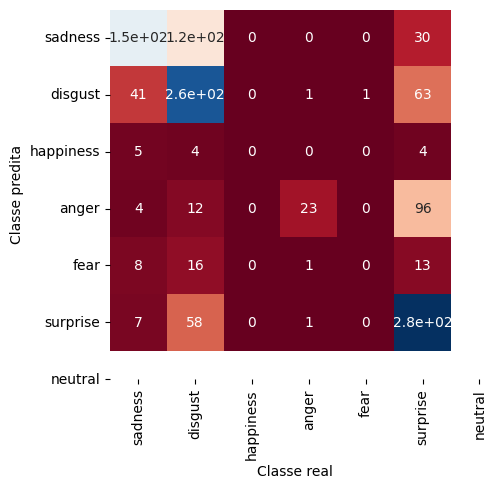

In [514]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categorias.unique(),
            yticklabels=categorias.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [516]:
textos_bow1 = BOW_dataframe
categorias1 = data_content2['sp_ordinal']

In [517]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow1, categorias1, test_size=0.4) #45% para teste.
# X_train contém os 60% dos dados - treinamento
# y_train contém os 60% das categorias (atributo alvo) - treinamento

# X_test contém os 40% dos dados - teste
# y_test contém os 40% das categorias - teste
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test) # recebe os 20% dos dados de teste sem as categorias - "escondidas"

In [518]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes,zero_division=1))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       460
           1       1.00      0.00      0.00        31
           2       0.84      0.87      0.86       714

    accuracy                           0.82      1205
   macro avg       0.87      0.55      0.55      1205
weighted avg       0.82      0.82      0.81      1205



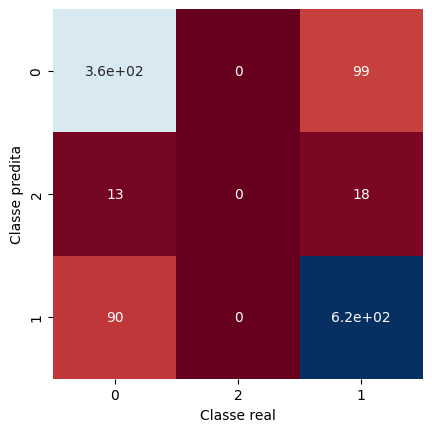

In [519]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categorias1.unique(),
            yticklabels=categorias1.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

#Diagonal Principal: Contém o número de predições corretas para cada classe.
#Fora da Diagonal: Contém o número de predições incorretas, onde a classe real foi confundida com outra.

#Extração da features (representação de texto em formato vetorial)

In [520]:
BoW_matriz2 = vectorizer.fit_transform(data_content2['content'])

In [521]:
BOW_dataframe2=pd.DataFrame(BoW_matriz2.toarray(),columns=vectorizer.get_feature_names_out())
BOW_dataframe2

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Treinamento e teste

In [522]:
textos_bow_content2 = BOW_dataframe2
categorias2 = data_content2['sentiment_binary']

In [523]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow_content2, categorias2, test_size=0.4)

In [524]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test)

In [525]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes,zero_division=1))

              precision    recall  f1-score   support

     0000001       1.00      0.00      0.00         2
     0000010       0.55      0.71      0.62       340
     0000100       1.00      0.00      0.00        29
     0001000       0.74      0.26      0.39       123
     0010000       1.00      0.00      0.00        19
     0100000       0.51      0.67      0.58       376
     1000000       0.61      0.44      0.51       316

    accuracy                           0.55      1205
   macro avg       0.77      0.30      0.30      1205
weighted avg       0.59      0.55      0.53      1205



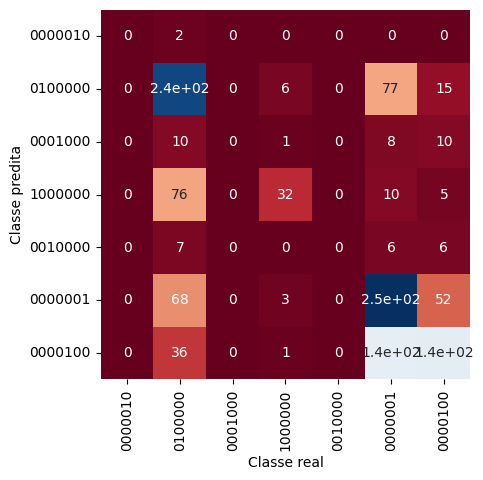

In [526]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categorias2.unique(),
            yticklabels=categorias2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [527]:
categorias3 = data_content2['sp_ordinal']

In [528]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow_content2, categorias3, test_size=0.4)

In [529]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test)

In [530]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes,zero_division=1))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       486
           1       1.00      0.00      0.00        38
           2       0.82      0.87      0.85       681

    accuracy                           0.81      1205
   macro avg       0.87      0.55      0.54      1205
weighted avg       0.81      0.81      0.79      1205



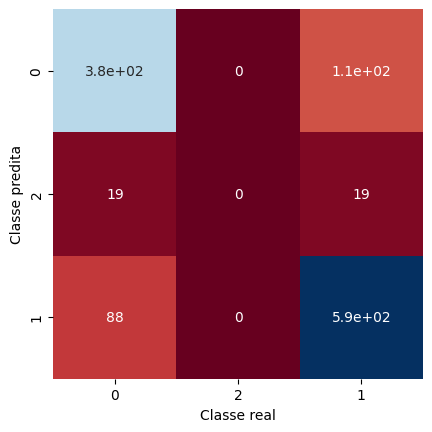

In [531]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categorias3.unique(),
            yticklabels=categorias3.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

#Teste para comentário novo

Prevendo sentimento:

In [532]:
naive_bayes = MultinomialNB()
naive_bayes.fit(textos_bow_content2, categorias2)

MultinomialNB()

In [533]:
sentiment_real = 'anger'
coment = 'O produto veio todo amassado péssimo não recomendo'

In [534]:
coment_SohTexto = regex.sub('[^\p{Latin}]', u' ', coment)
coment_lower = coment.lower()
coment_sem_pontuacao = regex.sub(r'[^\w\s]', '', coment_lower)
coment_semStops = remove_stopwords(coment_sem_pontuacao)
coment_semStops

'produto veio todo amassado péssimo recomendo'

In [537]:
coment_bow = vectorizer.transform([coment_semStops])

In [539]:
sentiment_predito= naive_bayes.predict(coment_bow)
val1 = sentiment_predito[0]

if val1 in sentiment_mapping_dtf['sentiment_binary'].unique():
  sentiment_predito = sentiment_mapping_dtf[sentiment_mapping_dtf['sentiment_binary'] == val]['sentiment'].values[0]

print('A classe predita para essa notícia é: ', sentiment_predito);

print('A classe real dessa noticia é: ',sentiment_real)

A classe predita para essa notícia é:  anger
A classe real dessa noticia é:  anger


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MultinomialNB was fitted with feature names



In [540]:
naive_bayes = MultinomialNB()
naive_bayes.fit(textos_bow_content2, categorias3)
sentimento_polarity_real='negative'

In [541]:
coment_bow = vectorizer.transform([coment_semStops])

In [548]:
sentiment_pol_predito= naive_bayes.predict(coment_bow)
val2 = sentiment_pol_predito[0].astype(int)
if val2 in sent_pol_dtf['sp_ordinal'].unique():
  sentiment_pol_predito = sent_pol_dtf[sent_pol_dtf['sp_ordinal'] == val2]['sentiment_polarity'].values[0]

print('A classe predita para essa notícia é: ', sentiment_pol_predito)

print('A classe real dessa noticia é: ',sentimento_polarity_real)

A classe predita para essa notícia é:  negative
A classe real dessa noticia é:  negative




---

 # TF-IDF + KNN


---



In [555]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

vectorizer_tfidf = tfidf.fit_transform(data_content2['content'])

tfidf_DataFrame = pd.DataFrame(vectorizer_tfidf.toarray(), columns=tfidf.get_feature_names_out())

tfidf_DataFrame.head(20)

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [588]:
from sklearn.pipeline import make_pipeline

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(data_content2['content'],
                                                    data_content2['sentiment_binary'],
                                                    test_size=0.4)
model_tfidf = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_tfidf = model_tfidf.fit(X_train_tfidf, y_train_tfidf)

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

In [589]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print('Multinomial Naive Bayes with TF-IDF:')
print('-' * 40)
print(f'f1: {f1_tfidf:.4f}')
print(f'accuracy: {accuracy_tfidf:.4f}')

Multinomial Naive Bayes with TF-IDF:
----------------------------------------
f1: 0.4723
accuracy: 0.5320


In [590]:
print(classification_report(y_test_tfidf, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

     0000001       1.00      0.00      0.00         2
     0000010       0.54      0.72      0.62       348
     0000100       1.00      0.00      0.00        36
     0001000       1.00      0.00      0.00       117
     0010000       1.00      0.00      0.00        20
     0100000       0.49      0.80      0.61       385
     1000000       0.71      0.28      0.40       297

    accuracy                           0.53      1205
   macro avg       0.82      0.26      0.23      1205
weighted avg       0.63      0.53      0.47      1205



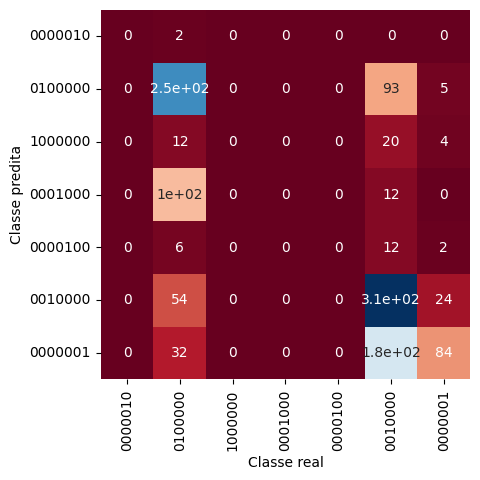

In [591]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_tfidf, y_pred_tfidf)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= y_test_tfidf.unique(),
            yticklabels= y_test_tfidf.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [594]:
from sklearn.pipeline import make_pipeline

X_train_tfidf2, X_test_tfidf2, y_train_tfidf2, y_test_tfidf2 = train_test_split(data_content2['content'],
                                                    data_content2['sp_ordinal'],
                                                    test_size=0.4)
model_tfidf = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_tfidf = model_tfidf.fit(X_train_tfidf2, y_train_tfidf2)

y_pred_tfidf2 = model_tfidf.predict(X_test_tfidf2)

In [596]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

f1_tfidf2 = f1_score(y_test_tfidf2, y_pred_tfidf2, average='weighted')
accuracy_tfidf2 = accuracy_score(y_test_tfidf2, y_pred_tfidf2)
print('Multinomial Naive Bayes with TF-IDF:')
print('-' * 40)
print(f'f1: {f1_tfidf2:.4f}')
print(f'accuracy: {accuracy_tfidf2:.4f}')

Multinomial Naive Bayes with TF-IDF:
----------------------------------------
f1: 0.7509
accuracy: 0.7734


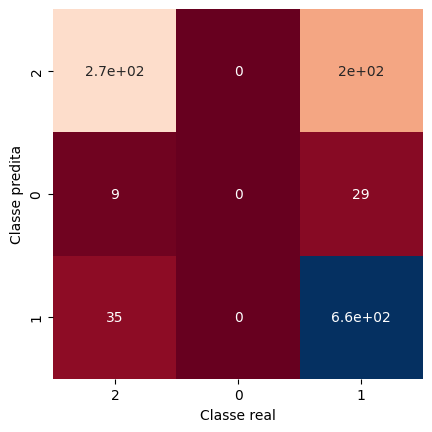

In [597]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_tfidf2, y_pred_tfidf2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= y_test_tfidf2.unique(),
            yticklabels= y_test_tfidf2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---
# BoW + KNN


---

